# Gaussian XOR and Gaussian R-XOR BTE with Supervised Alignment

In [1]:
import numpy as np

#import functions.xor_rxor_with_icp_functions as fn
import functions.xor_rxor_with_icp_functions as fn
from proglearn.sims import generate_gaussian_parity

## Classification Problem

Differs from CPD because aligns tasks with label supervision instead of aligning distributions in purely unsupervised manner.

A-XOR is an unrotated version of R-XOR to match XOR

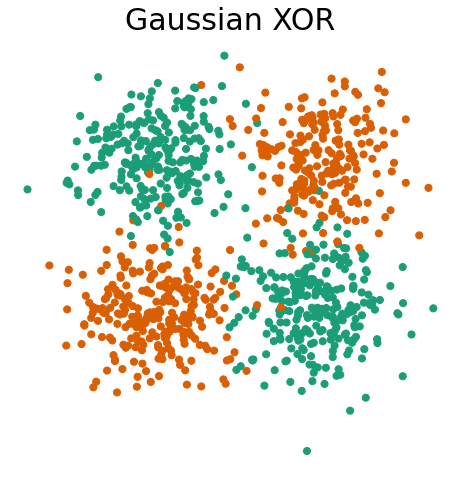

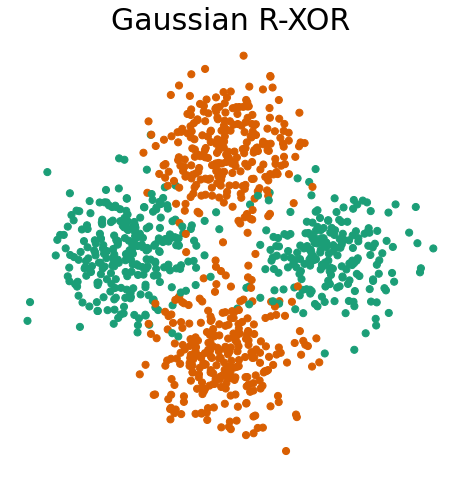

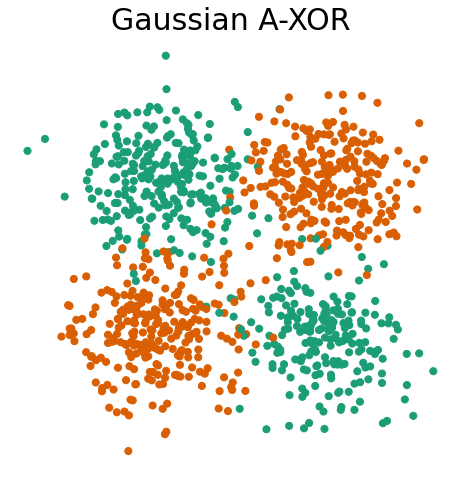

In [2]:
# call function to return gaussian xor and r-xor data:
X_xor, y_xor = generate_gaussian_parity(1000)
X_rxor, y_rxor = generate_gaussian_parity(1000, angle_params=np.pi/4)
# call function to adapt r-xor to xor:
T, X_axor, i = fn.icp(X_rxor.copy(), X_xor.copy(), y_rxor.copy(), y_xor.copy())
X_axor = X_axor.T[:,0:2]

# plot and format:
fn.plot_xor_rxor(X_xor, y_xor, 'Gaussian XOR')
fn.plot_xor_rxor(X_rxor, y_rxor, 'Gaussian R-XOR')
fn.plot_xor_rxor(X_axor, y_rxor, 'Gaussian A-XOR')

## Experiment

In [3]:
angle_sweep = range(0,91,10)
task1_sample = 100
task2_sample = 100
mc_rep = 500

Run classifier with adaption off

In [4]:
mean_te1 = fn.bte_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep, register=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   39.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   36.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   34.4s finished
[

Run classifier with adaption on

In [5]:
mean_te2 = fn.bte_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep, register=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   39.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   40.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   40.8s finished
[

## Visualize Results

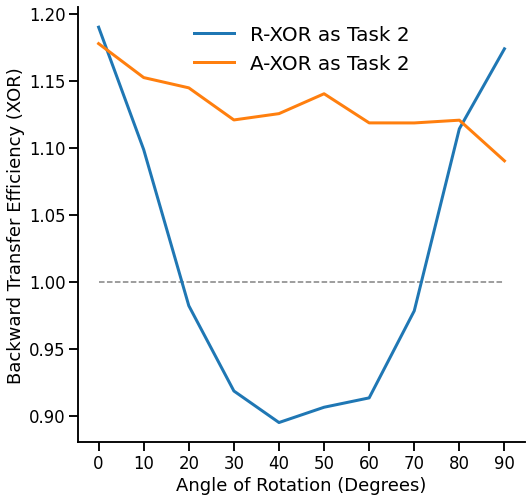

In [6]:
fn.plot_bte_v_angle(angle_sweep, mean_te1, mean_te2)